# Exercise 8: Implementation (Advanced regression) 

## 1- Polynomial regression

Linear regression assumes a linear relationship, attempting to fit a straight line that minimizes the error between predictions and actual values. It is computationally simple, easy to interpret, and works well when the relationship is truly linear.
Polynomial regression, on the other hand, is an extension of linear regression that transforms input features into polynomial terms, enabling the model to capture non-linear patterns. By introducing flexibility, polynomial regression can effectively model relationships that linear regression cannot.


Linear Regression Test Metrics:
MSE: 3570.7893959056423
MAE: 53.761573493177266
R²: -0.057401530166842685

Polynomial Regression Test Metrics:
MSE: 52.33608764664731
MAE: 5.743494453279449
R²: 0.9845019537629507


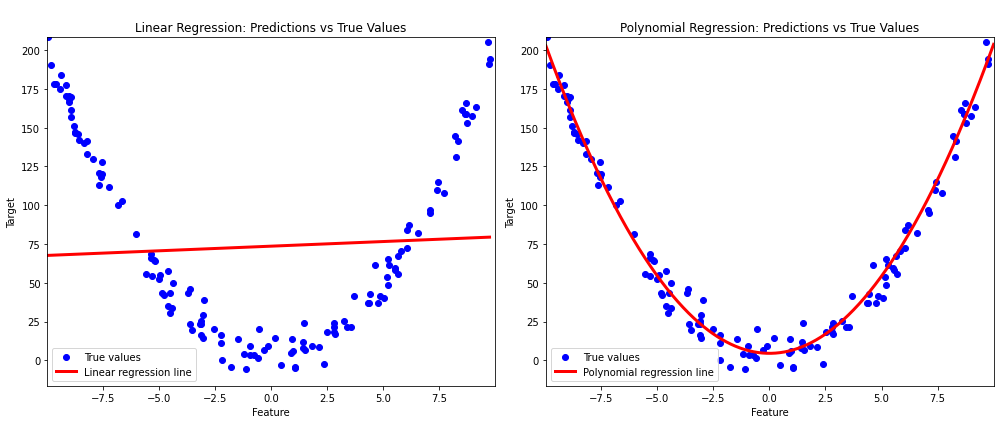

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Generate synthetic data with 1 feature and noise
X = np.random.uniform(-10, 10, 500)  

# Convert y to a more complex target function: y = 2*X^2 + 3 + noise
y = 2*X**2 + 3 + np.random.normal(0, 8, X.shape)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.45)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training set (reshaped for linear regression)
# X_train is reshaped from a 1D array of shape (n_samples,) to a 2D array of shape (n_samples, 1).
# .reshape(-1, 1) is used to transform X_train into a 2D array with one column, 
# where -1 tells NumPy to infer the number of rows automatically (i.e., the number of samples), 
# and 1 indicates there is only one feature per sample.
model.fit(X_train.reshape(-1, 1), y_train)

# Make predictions on validation and testing sets
y_val_pred = model.predict(X_val.reshape(-1, 1))
y_test_pred = model.predict(X_test.reshape(-1, 1))

# Testing the Linear Regression model
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print metrics for Linear Regression
print("\nLinear Regression Test Metrics:")
print("MSE:", test_mse)
print("MAE:", test_mae)
print("R²:", test_r2)

# Polynomial Regression: Fit a higher-degree polynomial (degree 2)
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train.reshape(-1, 1))
X_val_poly = poly_features.transform(X_val.reshape(-1, 1))
X_test_poly = poly_features.transform(X_test.reshape(-1, 1))

# Train the Polynomial Regression model
model.fit(X_train_poly, y_train)

# Make predictions on validation and testing sets
y_val_pred_poly = model.predict(X_val_poly)
y_test_pred_poly = model.predict(X_test_poly)

# Testing the Polynomial Regression model
test_mse_poly = mean_squared_error(y_test, y_test_pred_poly)
test_mae_poly = mean_absolute_error(y_test, y_test_pred_poly)
test_r2_poly = r2_score(y_test, y_test_pred_poly)

# Print metrics for Polynomial Regression
print("\nPolynomial Regression Test Metrics:")
print("MSE:", test_mse_poly)
print("MAE:", test_mae_poly)
print("R²:", test_r2_poly)

# Visualize results for both models
plt.figure(figsize=(14, 6))

# Get global min and max for X and y to set the same axis range
x_min, x_max = X.min(), X.max()
y_min, y_max = y.min(), y.max()

# Linear Regression Plot
plt.subplot(1, 2, 1)
plt.scatter(X_val, y_val, color='blue', label='True values')

# Sort X_val for a smooth fitted line
sorted_indices = np.argsort(X_val)
X_val_sorted = X_val[sorted_indices]
y_val_pred_sorted = y_val_pred[sorted_indices]

plt.plot(X_val_sorted, y_val_pred_sorted, color='red', linewidth=3, label='Linear regression line')
plt.title('\nLinear Regression: Predictions vs True Values')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()

# Set the same x and y axis limits for both plots
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# Polynomial Regression Plot
plt.subplot(1, 2, 2)
plt.scatter(X_val, y_val, color='blue', label='True values')

# Create a smooth curve for the polynomial regression fitted line
X_smooth = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)  # Reshaping for smooth curve
X_smooth_poly = poly_features.transform(X_smooth)
y_smooth_pred_poly = model.predict(X_smooth_poly)

plt.plot(X_smooth, y_smooth_pred_poly, color='red', linewidth=3, label='Polynomial regression line')
plt.title('Polynomial Regression: Predictions vs True Values')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()

# Set the same x and y axis limits for both plots
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.tight_layout()
plt.show()


Linear Regression Test Metrics:
MSE: 10480.012247358383
MAE: 86.06514565145994
R²: 0.6551570987716671

Polynomial Regression Test Metrics:
MSE: 967.7803476481027
MAE: 25.069447430921493
R²: 0.968155363280338


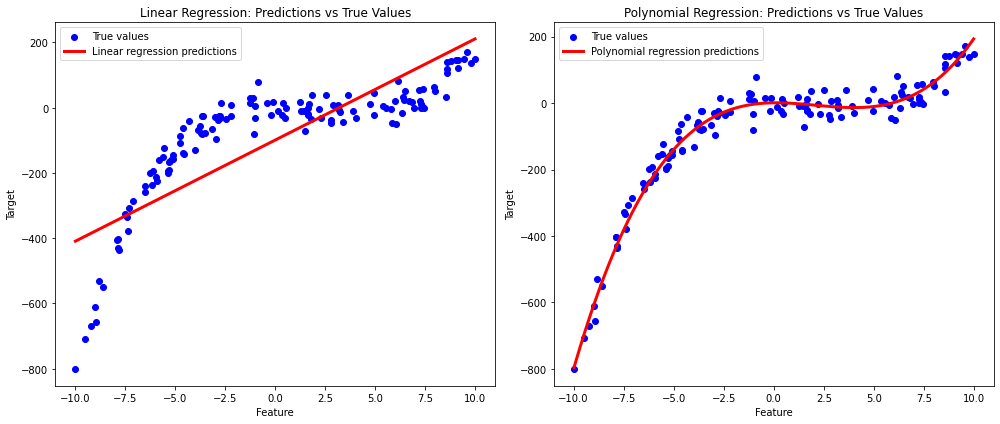

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Generate random X values (500 samples between -10 and 10)
X = np.random.uniform(-10, 10, 500)  # 1D array directly

# Generate Y values using a more complex function of X
# y = 0.5 * X^3 - 3 * X^2 + 2 * sin(X) + noise
y = 0.5 * X**3 - 3 * X**2 + 2 * np.sin(X) + np.random.normal(0, 30, X.shape)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.45)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4)

# Initialize the Linear Regression model
lin_reg_model = LinearRegression()

# Train the model on the training set
# Train the model on the training set (reshaped for linear regression)
# X_train is reshaped from a 1D array of shape (n_samples,) to a 2D array of shape (n_samples, 1).
# .reshape(-1, 1) is used to transform X_train into a 2D array with one column, 
# where -1 tells NumPy to infer the number of rows automatically (i.e., the number of samples), 
# and 1 indicates there is only one feature per sample.
lin_reg_model.fit(X_train.reshape(-1, 1), y_train)

# Make predictions on validation and testing sets
y_val_pred_lin = lin_reg_model.predict(X_val.reshape(-1, 1))
y_test_pred_lin = lin_reg_model.predict(X_test.reshape(-1, 1))

# Evaluate the Linear Regression model
val_mse_lin = mean_squared_error(y_val, y_val_pred_lin)
val_mae_lin = mean_absolute_error(y_val, y_val_pred_lin)
val_r2_lin = r2_score(y_val, y_val_pred_lin)

test_mse_lin = mean_squared_error(y_test, y_test_pred_lin)
test_mae_lin = mean_absolute_error(y_test, y_test_pred_lin)
test_r2_lin = r2_score(y_test, y_test_pred_lin)

# Print test metrics for Linear Regression
print("\nLinear Regression Test Metrics:")
print("MSE:", test_mse_lin)
print("MAE:", test_mae_lin)
print("R²:", test_r2_lin)

# Initialize the Polynomial Regression model (degree 3 for this more complex function)
poly_features = PolynomialFeatures(degree=3)
X_train_poly = poly_features.fit_transform(X_train.reshape(-1, 1))
X_val_poly = poly_features.transform(X_val.reshape(-1, 1))
X_test_poly = poly_features.transform(X_test.reshape(-1, 1))

poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train_poly, y_train)

# Make predictions on validation and testing sets (Polynomial Regression)
y_val_pred_poly = poly_reg_model.predict(X_val_poly)
y_test_pred_poly = poly_reg_model.predict(X_test_poly)

# Evaluate the Polynomial Regression model
val_mse_poly = mean_squared_error(y_val, y_val_pred_poly)
val_mae_poly = mean_absolute_error(y_val, y_val_pred_poly)
val_r2_poly = r2_score(y_val, y_val_pred_poly)

test_mse_poly = mean_squared_error(y_test, y_test_pred_poly)
test_mae_poly = mean_absolute_error(y_test, y_test_pred_poly)
test_r2_poly = r2_score(y_test, y_test_pred_poly)

# Print test metrics for Polynomial Regression
print("\nPolynomial Regression Test Metrics:")
print("MSE:", test_mse_poly)
print("MAE:", test_mae_poly)
print("R²:", test_r2_poly)

# Visualize the results for Linear Regression
plt.figure(figsize=(14, 6))

# Linear Regression Plot
plt.subplot(1, 2, 1)
plt.scatter(X_val, y_val, color='blue', label='True values')

# Create a smooth line for linear regression predictions
X_smooth = np.linspace(X.min(), X.max(), 500)  # Dense grid for smooth plotting
y_smooth_pred_lin = lin_reg_model.predict(X_smooth.reshape(-1, 1))

plt.plot(X_smooth, y_smooth_pred_lin, color='red', linewidth=3, label='Linear regression predictions')
plt.title('Linear Regression: Predictions vs True Values')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()

# Polynomial Regression Plot
plt.subplot(1, 2, 2)
plt.scatter(X_val, y_val, color='blue', label='True values')

# Create a smooth line for polynomial regression predictions
X_smooth_poly = poly_features.transform(X_smooth.reshape(-1, 1))
y_smooth_pred_poly = poly_reg_model.predict(X_smooth_poly)

plt.plot(X_smooth, y_smooth_pred_poly, color='red', linewidth=3, label='Polynomial regression predictions')
plt.title('Polynomial Regression: Predictions vs True Values')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()

plt.tight_layout()
plt.show()

## 2- Support Vector Regression (SVR)

SVR is a regression technique based on Support Vector Machines (SVM). It works by finding a line, curve, or surface that best fits the data while allowing for a certain margin of error (epsilon). SVR focuses on minimizing the deviation from the data within this margin and uses support vectors to determine the model. It can handle both linear and non-linear data


SVR Test Metrics:
MSE: 7917.112350434316
MAE: 71.57348387000563
R²: 0.9855598175941022


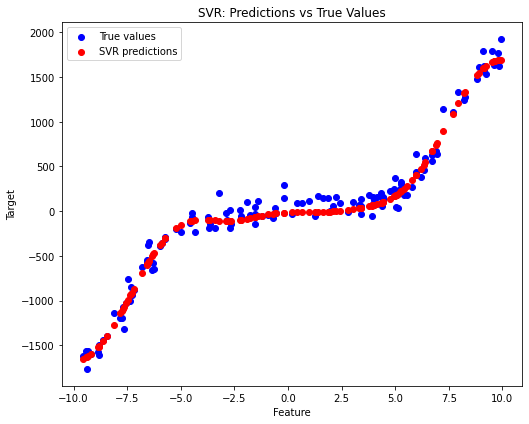

In [3]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Generate synthetic data
X = np.random.uniform(-10, 10, 500)  
y = 2*X**3 + 3*X**2 * np.sin(X) + np.random.normal(0, 100, X.shape)

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.45)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4)

# Initialize SVR model with a kernel:
# rbf
# poly
# linear
svr_model = SVR(kernel='rbf', C=1000, gamma=0.1, epsilon=0.1)  

# Train the SVR model
svr_model.fit(X_train.reshape(-1, 1), y_train)

# Make predictions
y_val_pred_svr = svr_model.predict(X_val.reshape(-1, 1))
y_test_pred_svr = svr_model.predict(X_test.reshape(-1, 1))

# Evaluation metrics
test_mse_svr = mean_squared_error(y_test, y_test_pred_svr)
test_mae_svr = mean_absolute_error(y_test, y_test_pred_svr)
test_r2_svr = r2_score(y_test, y_test_pred_svr)

# Print metrics for SVR
print("\nSVR Test Metrics:")
print("MSE:", test_mse_svr)
print("MAE:", test_mae_svr)
print("R²:", test_r2_svr)

# Visualize SVR results
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_val, y_val, color='blue', label='True values')
plt.scatter(X_val, y_val_pred_svr, color='red', label='SVR predictions')  # Red dots for predictions
plt.title('SVR: Predictions vs True Values')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.tight_layout()
plt.show()


## 3- k-Nearest Neighbors Regression (k-NN)

k-NN is a non-parametric algorithm that makes predictions based on the average (or weighted average) of the target values of the k nearest data points to a new sample. It doesn't assume a specific form for the relationship between features and target values, making it flexible for non-linear data. The choice of 'k' (number of neighbors) and distance metric (e.g., Euclidean) influences its performance.


KNN Test Metrics:
MSE: 10442.033178229587
MAE: 87.175364477709
R²: 0.9826016941674708


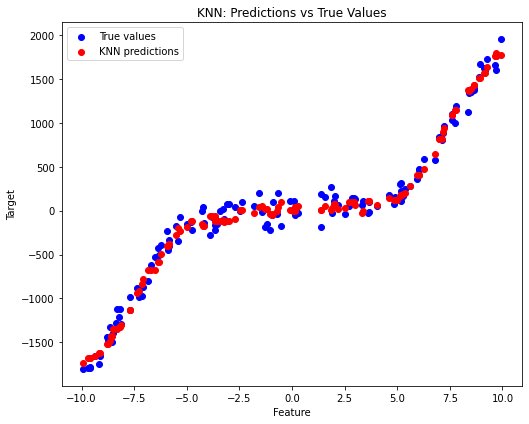

In [4]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Generate synthetic data
X = np.random.uniform(-10, 10, 500)  
y = 2*X**3 + 3*X**2 * np.sin(X) + np.random.normal(0, 100, X.shape)

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.45)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4)

# Initialize KNN regression model
# euclidean distance (default).
# manhattan: known as L1 distance.
# minkowski: generalizes both Euclidean and Manhattan distance.
# chebyshev: chebyshev distance.
# cosine: cosine distance (used in vector space models).
# precomputed: If you provide a distance matrix directly.
knn_model = KNeighborsRegressor(n_neighbors=5, metric='euclidean')   

# Train the KNN model
knn_model.fit(X_train.reshape(-1, 1), y_train)

# Make predictions
y_val_pred_knn = knn_model.predict(X_val.reshape(-1, 1))
y_test_pred_knn = knn_model.predict(X_test.reshape(-1, 1))

# Evaluation metrics
test_mse_knn = mean_squared_error(y_test, y_test_pred_knn)
test_mae_knn = mean_absolute_error(y_test, y_test_pred_knn)
test_r2_knn = r2_score(y_test, y_test_pred_knn)

# Print metrics for KNN
print("\nKNN Test Metrics:")
print("MSE:", test_mse_knn)
print("MAE:", test_mae_knn)
print("R²:", test_r2_knn)

# Visualize KNN results
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_val, y_val, color='blue', label='True values')
plt.scatter(X_val, y_val_pred_knn, color='red', label='KNN predictions')  # Red dots for predictions
plt.title('KNN: Predictions vs True Values')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.tight_layout()
plt.show()


## 4- Decision Trees

Decision Trees are a model that splits data into subsets based on feature values. In regression, they predict continuous target values by recursively dividing the data based on feature conditions that minimize error (e.g., mean squared error). Each leaf node represents the predicted value, and the tree structure is easy to interpret. 


Decision Tree Test Metrics:
MSE: 19212.861239924932
MAE: 110.73158051479942
R²: 0.9688177136150281


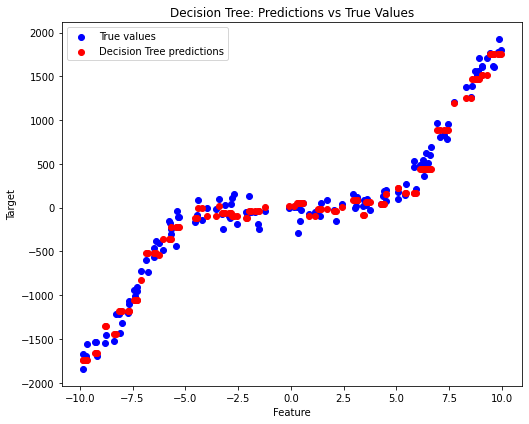

In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Generate synthetic data
X = np.random.uniform(-10, 10, 500)  
y = 2*X**3 + 3*X**2 * np.sin(X) + np.random.normal(0, 100, X.shape)

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.45)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4)

# Initialize Decision Tree Regressor model with hyperparameters
dt_model = DecisionTreeRegressor(
    min_samples_leaf=5,        # Minimum number of samples in a leaf
    max_depth=10,             # Maximum depth of the tree
    min_samples_split=10      # Minimum number of samples required to split an internal node
)

# Train the Decision Tree model
dt_model.fit(X_train.reshape(-1, 1), y_train)

# Make predictions
y_val_pred_dt = dt_model.predict(X_val.reshape(-1, 1))
y_test_pred_dt = dt_model.predict(X_test.reshape(-1, 1))

# Evaluation metrics
test_mse_dt = mean_squared_error(y_test, y_test_pred_dt)
test_mae_dt = mean_absolute_error(y_test, y_test_pred_dt)
test_r2_dt = r2_score(y_test, y_test_pred_dt)

# Print metrics for Decision Tree
print("\nDecision Tree Test Metrics:")
print("MSE:", test_mse_dt)
print("MAE:", test_mae_dt)
print("R²:", test_r2_dt)

# Visualize Decision Tree results
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_val, y_val, color='blue', label='True values')
plt.scatter(X_val, y_val_pred_dt, color='red', label='Decision Tree predictions')  # Red dots for predictions
plt.title('Decision Tree: Predictions vs True Values')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.tight_layout()
plt.show()
